In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Datascience/Project/daily_case.csv"
daily_case = pd.read_csv(path)

print(daily_case.head())

   Sno        Date     Time State/UnionTerritory ConfirmedIndianNational  \
0    1  2020-01-30  6:00 PM               Kerala                       1   
1    2  2020-01-31  6:00 PM               Kerala                       1   
2    3  2020-02-01  6:00 PM               Kerala                       2   
3    4  2020-02-02  6:00 PM               Kerala                       3   
4    5  2020-02-03  6:00 PM               Kerala                       3   

  ConfirmedForeignNational  Cured  Deaths  Confirmed  
0                        0      0       0          1  
1                        0      0       0          1  
2                        0      0       0          2  
3                        0      0       0          3  
4                        0      0       0          3  


In [ ]:
daily_case.value_counts('State/UnionTerritory')

State/UnionTerritory
Kerala                                      560
Delhi                                       528
Rajasthan                                   527
Haryana                                     526
Uttar Pradesh                               526
Ladakh                                      523
Tamil Nadu                                  523
Punjab                                      521
Jammu and Kashmir                           521
Maharashtra                                 520
Karnataka                                   520
Andhra Pradesh                              518
Uttarakhand                                 515
Odisha                                      514
Puducherry                                  512
West Bengal                                 512
Chandigarh                                  511
Chhattisgarh                                511
Gujarat                                     510
Himachal Pradesh                            508
Madhya Pradesh     

In [ ]:
values = daily_case['State/UnionTerritory'].value_counts(dropna=False).keys().tolist()
counts = daily_case['State/UnionTerritory'].value_counts(dropna=False).tolist()
value_dict = dict(zip(values, counts))

print(value_dict)

{'Kerala': 560, 'Delhi': 528, 'Rajasthan': 527, 'Uttar Pradesh': 526, 'Haryana': 526, 'Ladakh': 523, 'Tamil Nadu': 523, 'Punjab': 521, 'Jammu and Kashmir': 521, 'Maharashtra': 520, 'Karnataka': 520, 'Andhra Pradesh': 518, 'Uttarakhand': 515, 'Odisha': 514, 'Puducherry': 512, 'West Bengal': 512, 'Chhattisgarh': 511, 'Chandigarh': 511, 'Gujarat': 510, 'Himachal Pradesh': 508, 'Madhya Pradesh': 508, 'Bihar': 506, 'Manipur': 506, 'Mizoram': 505, 'Andaman and Nicobar Islands': 504, 'Goa': 504, 'Assam': 498, 'Jharkhand': 498, 'Arunachal Pradesh': 496, 'Tripura': 492, 'Meghalaya': 485, 'Dadra and Nagar Haveli and Daman and Diu': 461, 'Nagaland': 452, 'Sikkim': 445, 'Telengana': 426, 'Lakshadweep': 244, 'Telangana': 102, 'Cases being reassigned to states': 60, 'Unassigned': 3, 'Dadra and Nagar Haveli': 2, 'Bihar****': 2, 'Daman & Diu': 1, 'Madhya Pradesh***': 1, 'Himanchal Pradesh': 1, 'Karanataka': 1, 'Maharashtra***': 1}


In [ ]:
value_dict['Dadra and Nagar Haveli and Daman and Diu'] += value_dict['Dadra and Nagar Haveli'] + value_dict['Daman & Diu']
value_dict['Bihar'] += value_dict['Bihar****']
value_dict['Maharashtra'] += value_dict['Maharashtra***']
value_dict['Madhya Pradesh'] += value_dict['Madhya Pradesh***']
value_dict['Karnataka'] += value_dict['Karanataka']
value_dict['Himachal Pradesh'] += value_dict['Himanchal Pradesh']
value_dict['Telangana'] += value_dict['Telengana']

In [ ]:
del value_dict['Dadra and Nagar Haveli']
del value_dict['Daman & Diu']
del value_dict['Bihar****']
del value_dict['Maharashtra***']
del value_dict['Madhya Pradesh***']
del value_dict['Cases being reassigned to states']
del value_dict['Unassigned']
del value_dict['Himanchal Pradesh']
del value_dict['Karanataka']
del value_dict['Telengana']

In [ ]:
print(daily_case.groupby('State/UnionTerritory')['Confirmed'].sum())

State/UnionTerritory
Andaman and Nicobar Islands                    1938498
Andhra Pradesh                               392432753
Arunachal Pradesh                              7176907
Assam                                         99837011
Bihar                                        132231166
Bihar****                                      1430909
Cases being reassigned to states                345565
Chandigarh                                    10858627
Chhattisgarh                                 163776262
Dadra and Nagar Haveli                           20722
Dadra and Nagar Haveli and Daman and Diu       1938632
Daman & Diu                                          2
Delhi                                        287227765
Goa                                           28240159
Gujarat                                      143420082
Haryana                                      134347285
Himachal Pradesh                              30033289
Himanchal Pradesh                           

In [ ]:
val = daily_case.groupby('State/UnionTerritory')['Confirmed'].sum().keys().tolist()
cnt = daily_case.groupby('State/UnionTerritory')['Confirmed'].sum().tolist()

tot_cases = dict(zip(val, cnt))

In [ ]:
print(tot_cases)

{'Andaman and Nicobar Islands': 1938498, 'Andhra Pradesh': 392432753, 'Arunachal Pradesh': 7176907, 'Assam': 99837011, 'Bihar': 132231166, 'Bihar****': 1430909, 'Cases being reassigned to states': 345565, 'Chandigarh': 10858627, 'Chhattisgarh': 163776262, 'Dadra and Nagar Haveli': 20722, 'Dadra and Nagar Haveli and Daman and Diu': 1938632, 'Daman & Diu': 2, 'Delhi': 287227765, 'Goa': 28240159, 'Gujarat': 143420082, 'Haryana': 134347285, 'Himachal Pradesh': 30033289, 'Himanchal Pradesh': 204516, 'Jammu and Kashmir': 58117726, 'Jharkhand': 62111994, 'Karanataka': 2885238, 'Karnataka': 485970693, 'Kerala': 458906023, 'Ladakh': 4054293, 'Lakshadweep': 915784, 'Madhya Pradesh': 135625265, 'Madhya Pradesh***': 791656, 'Maharashtra': 1121491467, 'Maharashtra***': 6229596, 'Manipur': 12617943, 'Meghalaya': 7355969, 'Mizoram': 2984732, 'Nagaland': 5041742, 'Odisha': 160130533, 'Puducherry': 20065891, 'Punjab': 99949702, 'Rajasthan': 162369656, 'Sikkim': 3186799, 'Tamil Nadu': 431928644, 'Telang

In [ ]:
tot_cases['Dadra and Nagar Haveli and Daman and Diu'] += tot_cases['Dadra and Nagar Haveli'] + tot_cases['Daman & Diu']
tot_cases['Bihar'] += tot_cases['Bihar****']
tot_cases['Maharashtra'] += tot_cases['Maharashtra***']
tot_cases['Madhya Pradesh'] += tot_cases['Madhya Pradesh***']
tot_cases['Karnataka'] += tot_cases['Karanataka']
tot_cases['Himachal Pradesh'] += tot_cases['Himanchal Pradesh']
tot_cases['Telangana'] += tot_cases['Telengana']

In [ ]:
del tot_cases['Dadra and Nagar Haveli']
del tot_cases['Daman & Diu']
del tot_cases['Bihar****']
del tot_cases['Maharashtra***']
del tot_cases['Madhya Pradesh***']
del tot_cases['Cases being reassigned to states']
del tot_cases['Unassigned']
del tot_cases['Himanchal Pradesh']
del tot_cases['Karanataka']
del tot_cases['Telengana']

In [ ]:
avg_case = {}
for k, v in tot_cases.items():
  avg_case[k] = tot_cases[k]/value_dict[k]

print(avg_case)

{'Andaman and Nicobar Islands': 3846.2261904761904, 'Andhra Pradesh': 757592.1872586872, 'Arunachal Pradesh': 14469.570564516129, 'Assam': 200475.92570281125, 'Bihar': 263114.32086614176, 'Chandigarh': 21249.75929549902, 'Chhattisgarh': 320501.4911937378, 'Dadra and Nagar Haveli and Daman and Diu': 4222.75, 'Delhi': 543991.9791666666, 'Goa': 56032.06150793651, 'Gujarat': 281215.8470588235, 'Haryana': 255413.08935361216, 'Himachal Pradesh': 59406.29666011788, 'Jammu and Kashmir': 111550.33781190019, 'Jharkhand': 124722.8795180723, 'Karnataka': 938303.1305182342, 'Kerala': 819475.0410714286, 'Ladakh': 7751.994263862332, 'Lakshadweep': 3753.2131147540986, 'Madhya Pradesh': 268009.6679764244, 'Maharashtra': 2164531.790786948, 'Manipur': 24936.646245059288, 'Meghalaya': 15166.946391752577, 'Mizoram': 5910.360396039604, 'Nagaland': 11154.29646017699, 'Odisha': 311538.0019455253, 'Puducherry': 39191.193359375, 'Punjab': 191842.03838771593, 'Rajasthan': 308101.81404174573, 'Sikkim': 7161.34606

### Hospital beds vs state avg cases

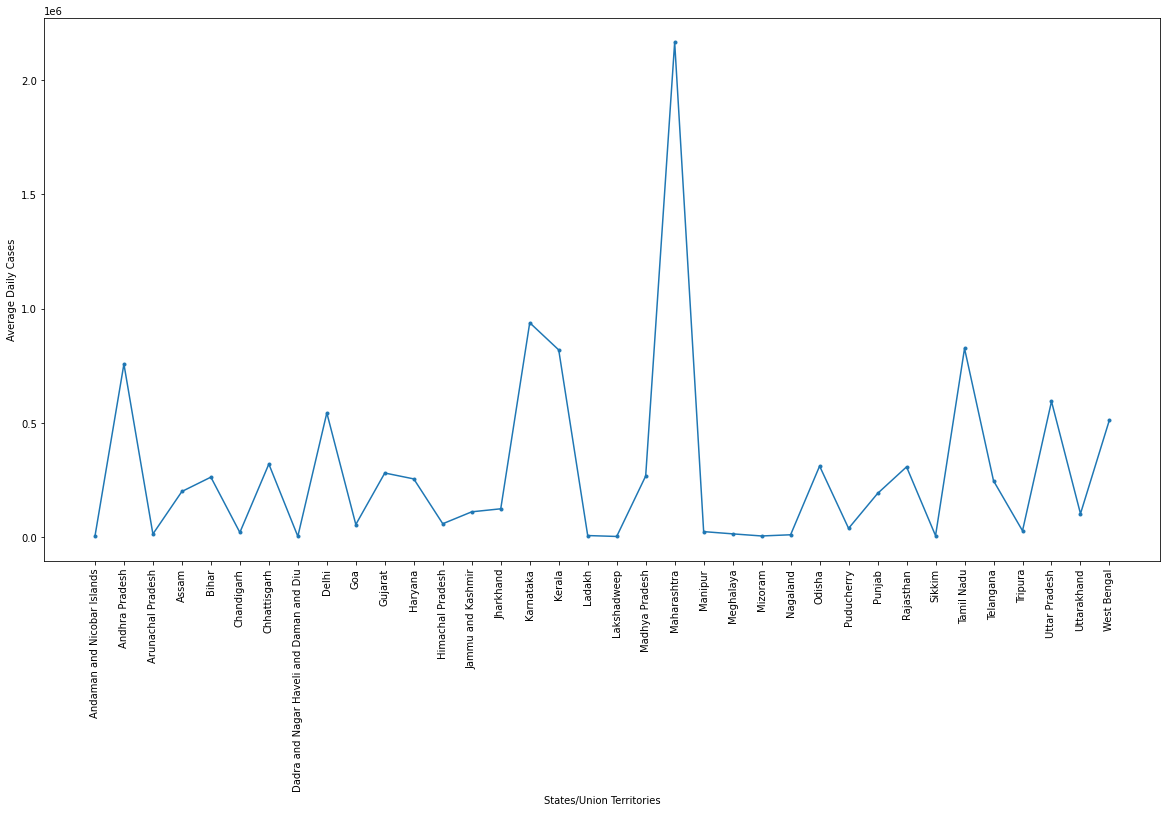

In [ ]:


myList = avg_case.items()
myList = sorted(myList) 
x, y = zip(*myList) 
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.xticks(rotation = 90)
plt.xlabel('States/Union Territories')
plt.ylabel('Average Daily Cases')
plt.plot(x, y, marker = '.')
plt.show()

print(len(x))

In [ ]:
path = "/content/drive/MyDrive/Datascience/Project/2020-beds.csv"
beds = pd.read_csv(path, skiprows = 1, usecols = ['State',	'beds-govt',	'beds-private',	'beds-total'])

beds.head()

36


,State,beds-govt,beds-private,beds-total
0,Lakshadweep,300,126,426
1,Dadra & Nagar Haveli,619,322,941
2,Daman And Diu,240,"1,010","1,250"
3,Andaman Nicobar Islands,"1,075",219,"1,294"
4,Manipur,"1,427",363,"1,790"


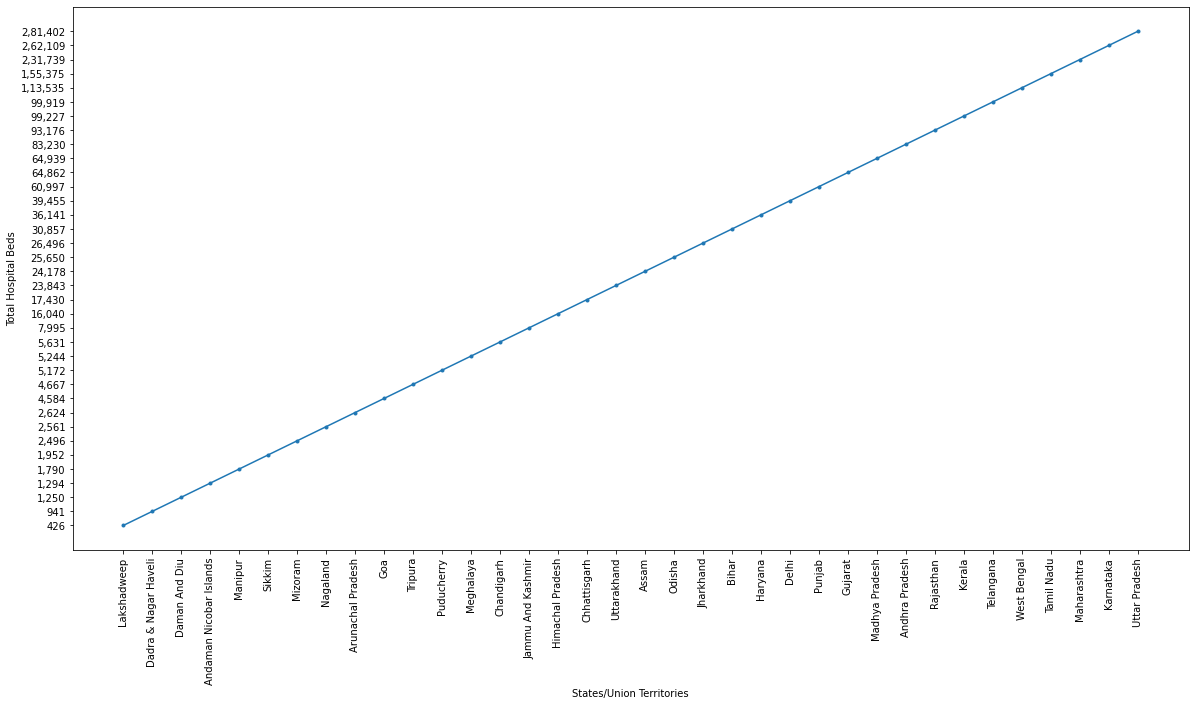

36


In [ ]:
x2 = beds['State'].tolist()
y2 = beds['beds-total'].tolist()
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.xticks(rotation = 90)
plt.xlabel('States/Union Territories')
plt.ylabel('Total Hospital Beds')
plt.plot(x2, y2, marker = '.')
plt.show()

print(len(x2))

In [ ]:
place = list(set(x2) & set(x))
print(len(place))

32


In [ ]:
y2_p = []
dn = 0
dd = 0
for i in range(len(place)):
  # print(place[i])
  # print(beds.index[beds['State'] == place[i]].tolist()[0])
  id = beds.index[beds['State'] == place[i]].tolist()[0]
  y2_p.append(beds['beds-total'][id])
 
y_p = [avg_case[i] for i in place]

In [ ]:
place.append('Dadra and Nagar Haveli and Daman and Diu')

In [ ]:
y_p.append(avg_case['Dadra and Nagar Haveli and Daman and Diu'])

In [ ]:
dd = 1250
dn = 941

In [ ]:
y2_pnew = [int(i.replace(',','')) for i in y2_p]
y2_p.append(dd+dn)
y2_pnew.append(dd+dn)

In [ ]:
print(len(place), len(y_p), len(y2_pnew))

33 33 33


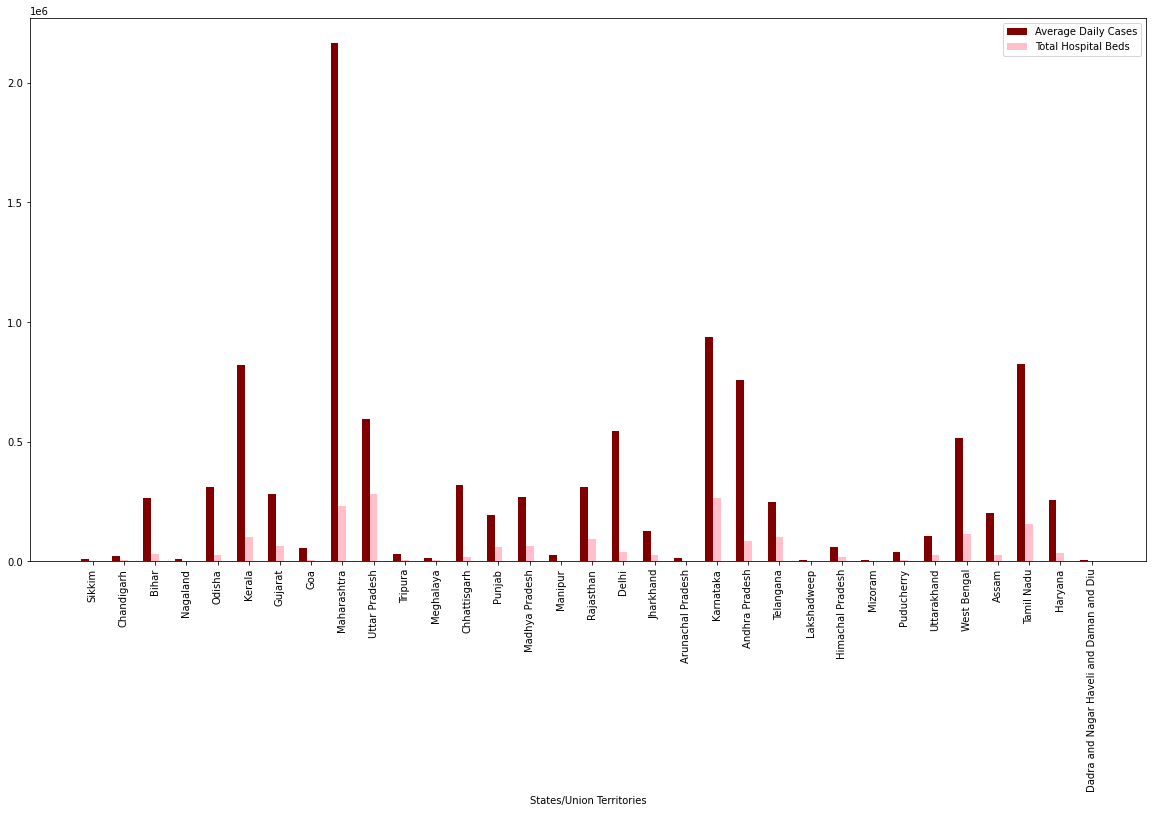

In [ ]:
f, ax = plt.subplots(figsize=(20,10))

barWidth = 0.25

br1 = np.arange(len(place))
br2 = [x + barWidth for x in br1]

plt.bar(br1, y_p, color ='maroon', width = barWidth , label = 'Average Daily Cases')
plt.bar(br2, y2_pnew, color ='pink', width = barWidth , label = 'Total Hospital Beds')

# plt.plot(place, y2_pnew, marker = '.', label = 'Total Hospital Beds')
# plt.plot(place, y_p, marker = '.', label = 'Average Daily Cases')

plt.xticks(rotation = 90)
plt.xlabel('States/Union Territories')
plt.xticks([r + barWidth for r in range(len(place))],
        [i for i in place])
# plt.yticks([])


plt.legend()
plt.show()


In [ ]:
val = daily_case.groupby('State/UnionTerritory')['Deaths'].sum().keys().tolist()
cnt = daily_case.groupby('State/UnionTerritory')['Deaths'].sum().tolist()

dth_cases = dict(zip(val, cnt))

In [ ]:
print(dth_cases)

{'Andaman and Nicobar Islands': 27136, 'Andhra Pradesh': 2939367, 'Arunachal Pradesh': 26799, 'Assam': 638323, 'Bihar': 1093466, 'Bihar****': 18881, 'Cases being reassigned to states': 0, 'Chandigarh': 147694, 'Chhattisgarh': 2063920, 'Dadra and Nagar Haveli': 8, 'Dadra and Nagar Haveli and Daman and Diu': 1014, 'Daman & Diu': 0, 'Delhi': 4943294, 'Goa': 447801, 'Gujarat': 2219448, 'Haryana': 1502799, 'Himachal Pradesh': 491348, 'Himanchal Pradesh': 3507, 'Jammu and Kashmir': 839694, 'Jharkhand': 748641, 'Karanataka': 36197, 'Karnataka': 6053762, 'Kerala': 1888177, 'Ladakh': 45804, 'Lakshadweep': 3908, 'Madhya Pradesh': 1777752, 'Madhya Pradesh***': 10506, 'Maharashtra': 23737432, 'Maharashtra***': 130753, 'Manipur': 173056, 'Meghalaya': 101950, 'Mizoram': 9791, 'Nagaland': 58460, 'Odisha': 790814, 'Puducherry': 312155, 'Punjab': 2785594, 'Rajasthan': 1473089, 'Sikkim': 53150, 'Tamil Nadu': 5916658, 'Telangana': 349648, 'Telengana': 400427, 'Tripura': 150342, 'Unassigned': 0, 'Uttar Pr

In [ ]:
dth_cases['Dadra and Nagar Haveli and Daman and Diu'] += dth_cases['Dadra and Nagar Haveli'] + dth_cases['Daman & Diu']
dth_cases['Bihar'] += dth_cases['Bihar****']
dth_cases['Maharashtra'] += dth_cases['Maharashtra***']
dth_cases['Madhya Pradesh'] += dth_cases['Madhya Pradesh***']
dth_cases['Karnataka'] += dth_cases['Karanataka']
dth_cases['Himachal Pradesh'] += dth_cases['Himanchal Pradesh']
dth_cases['Telangana'] += dth_cases['Telengana']

In [ ]:
del dth_cases['Dadra and Nagar Haveli']
del dth_cases['Daman & Diu']
del dth_cases['Bihar****']
del dth_cases['Maharashtra***']
del dth_cases['Madhya Pradesh***']
del dth_cases['Cases being reassigned to states']
del dth_cases['Unassigned']
del dth_cases['Himanchal Pradesh']
del dth_cases['Karanataka']
del dth_cases['Telengana']

In [ ]:
path = '/content/drive/MyDrive/Datascience/Project/state_vaccine.csv'

vac = pd.read_csv(path)

print(len(vac))
print(vac.info())
print(vac.iloc[0])

vac.drop(vac.index[7864:], axis=0, inplace=True)

print(len(vac))
print(vac.iloc[len(vac)-1])


10906
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10906 entries, 0 to 10905
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Vaccinated As of          10906 non-null  object
 1   State                     10906 non-null  object
 2   First Dose Administered   10906 non-null  int64 
 3   Second Dose Administered  10906 non-null  int64 
 4   Total Doses Administered  10906 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 426.1+ KB
None
Vaccinated As of                             16/01/2021
State                       Andaman and Nicobar Islands
First Dose Administered                             225
Second Dose Administered                              0
Total Doses Administered                            225
Name: 0, dtype: object
7864
Vaccinated As of             11/08/2021
State                       West Bengal
First Dose Administered        23818895
Second Dose Administere

In [ ]:
val = vac.groupby('State')['Total Doses Administered'].sum().keys().tolist()
cnt = vac.groupby('State')['Total Doses Administered'].sum().tolist()

doses = dict(zip(val, cnt))

In [ ]:
print(len(doses), len(dth_cases))
print(len(set(doses) & set(dth_cases)))

38 36
36


In [ ]:
print(doses)
print(dth_cases)

{'Andaman and Nicobar Islands': 21236534, 'Andhra Pradesh': 1639806810, 'Arunachal Pradesh': 62817713, 'Assam': 742253715, 'Bihar': 1800292726, 'Chandigarh': 58321213, 'Chhattisgarh': 1070964284, 'Dadra and Nagar Haveli and Daman and Diu': 40053140, 'Delhi': 836247601, 'Goa': 94945850, 'Gujarat': 2808702054, 'Haryana': 942523716, 'Himachal Pradesh': 402132192, 'Jammu and Kashmir': 510925764, 'Jharkhand': 745926521, 'Karnataka': 2367523135, 'Kerala': 1603418581, 'Ladakh': 23785206, 'Lakshadweep': 5598542, 'Madhya Pradesh': 2186588679, 'Maharashtra': 3594753955, 'Manipur': 82449538, 'Meghalaya': 76824705, 'Miscellaneous': 463362271, 'Mizoram': 59678329, 'Nagaland': 53524182, 'Odisha': 1327392908, 'Puducherry': 51536761, 'Punjab': 774662695, 'Rajasthan': 2770505803, 'Sikkim': 48039370, 'Tamil Nadu': 1637656649, 'Telangana': 1112329527, 'Total': 36132590002, 'Tripura': 264710677, 'Uttar Pradesh': 3446407341, 'Uttarakhand': 476605263, 'West Bengal': 2448306199}
{'Andaman and Nicobar Islands

In [ ]:
path = '/content/drive/MyDrive/Datascience/Project/population_2022.csv'

pop = pd.read_csv(path, names = ['State', 'Population'])
print(pop.head())

           State    Population
0         Kerala   3,56,99,443
1         Delhi    1,87,10,922
2      Rajasthan   8,10,32,689
3        Haryana   2,82,04,692
4  Uttar Pradesh  23,78,82,725


In [ ]:
name = pop.State.tolist()
popu = pop.Population.tolist()
state_pop = dict(zip(name, popu))

In [ ]:
print(state_pop)
for i in state_pop.keys():
  state_pop[i] = int(state_pop[i].replace(',',''))
print(state_pop)
state_pop['Delhi'] = state_pop['Delhi ']
del state_pop['Delhi ']

{'Kerala': '3,56,99,443', 'Delhi ': '1,87,10,922', 'Rajasthan': '8,10,32,689', 'Haryana': '2,82,04,692', 'Uttar Pradesh': '23,78,82,725', 'Ladakh': '2,89,023', 'Tamil Nadu': '7,78,41,267', 'Punjab': '3,01,41,373', 'Jammu and Kashmir': '1,36,06,320', 'Maharashtra': '12,31,44,223', 'Karnataka': '6,75,62,686', 'Andhra Pradesh': '5,39,03,393', 'Uttarakhand': '1,12,50,858', 'Odisha': '4,63,56,334', 'Puducherry': '14,13,542', 'West Bengal': '9,96,09,303', 'Chandigarh': '11,58,473', 'Chhattisgarh': '2,94,36,231', 'Gujarat': '6,38,72,399', 'Himachal Pradesh': '74,51,955', 'Madhya Pradesh': '8,53,58,965', 'Bihar': '12,47,99,926', 'Manipur': '30,91,545', 'Mizoram': '12,39,244', 'Andaman and Nicobar Islands': '4,17,036', 'Goa': '15,86,250', 'Assam': '3,56,07,039', 'Jharkhand': '3,85,93,948', 'Arunachal Pradesh': '15,70,458', 'Tripura': '41,69,794', 'Meghalaya': '33,66,710', 'Dadra and Nagar Haveli and Daman and Diu': '6,15,724', 'Nagaland': '22,49,695', 'Sikkim': '6,90,251', 'Telangana': '3,85,10

In [ ]:
states = list(set(doses) & set(dth_cases))
dth = [dth_cases[i]*100/state_pop[i] for i in states]
dos = [doses[i]/state_pop[i] for i in states]

In [ ]:
print(dth)
print(dos)

[7.7000975007642145, 12.74902393063973, 0.8913042143951271, 2.5985744734286205, 1.7059459447332483, 5.289093726196232, 3.474815467632584, 28.23016548463357, 19.382301839689223, 1.74180365556179, 3.6055018545280655, 3.0281788452227842, 7.01149545945607, 9.241762145340891, 2.0949855706427556, 5.597718939882809, 1.8178947510923646, 26.419296708093807, 1.9397885906878456, 1.7064448714960858, 15.84787369863298, 9.013790541127984, 5.453027789920386, 1.9476911806611423, 6.171352724322227, 5.340037986964186, 6.64060639120875, 0.7900784671945154, 22.083178285470115, 0.16598346012174287, 8.763784948667915, 3.8620780229734164, 1.792687676164255, 7.600927153459617, 5.32818794830307, 6.506872308385847]
[69.59695820795623, 50.343178477185056, 14.425431037515198, 23.791750437281497, 28.63455311198681, 44.91438650737492, 43.973642731033166, 59.85553979511426, 29.191413672730715, 14.487842028041339, 63.48291474351011, 22.818925597987352, 36.38252071061679, 25.700975698751346, 25.616391658450873, 26.669

### Death vs vaccines (per population)

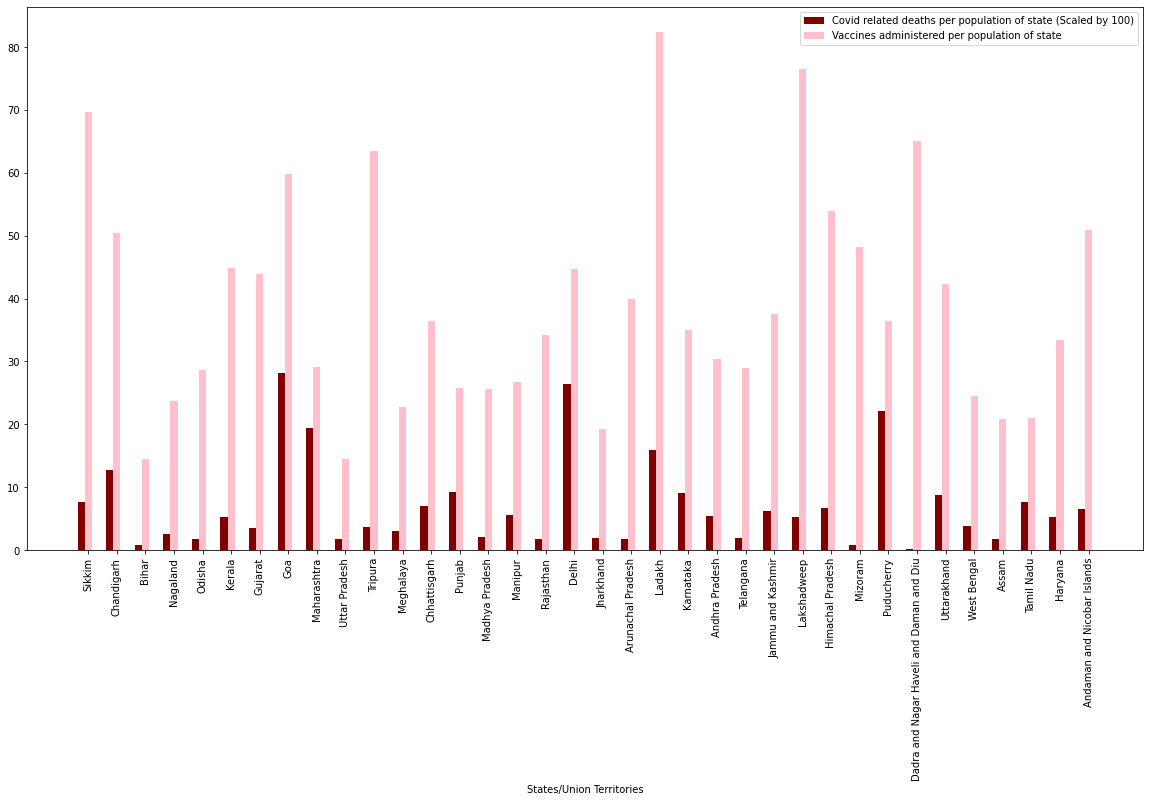

In [ ]:
f, ax = plt.subplots(figsize=(20,10))

barWidth = 0.25

br1 = np.arange(len(states))
br2 = [x + barWidth for x in br1]

plt.bar(br1, dth, color ='maroon', width = barWidth , label = 'Covid related deaths per population of state (Scaled by 100)')
plt.bar(br2, dos, color ='pink', width = barWidth , label = 'Vaccines administered per population of state')

# plt.plot(states, dth, marker = '.', label = 'Covid related deaths per population of state')
# plt.plot(states, dos, marker = '.', label = 'Vaccines administered deaths per population of state')

plt.xticks(rotation = 90)
plt.xlabel('States/Union Territories')
plt.xticks([r + barWidth for r in range(len(states))],
        [i for i in states])
# plt.yticks([])


plt.legend()
plt.show()


In [ ]:
path = '/content/drive/MyDrive/Datascience/Project/state_test.csv'

test = pd.read_csv(path)
print(test.head())

         Date                        State  TotalSamples Negative  Positive
0  2020-04-17  Andaman and Nicobar Islands        1403.0     1210      12.0
1  2020-04-24  Andaman and Nicobar Islands        2679.0      NaN      27.0
2  2020-04-27  Andaman and Nicobar Islands        2848.0      NaN      33.0
3  2020-05-01  Andaman and Nicobar Islands        3754.0      NaN      33.0
4  2020-05-16  Andaman and Nicobar Islands        6677.0      NaN      33.0


In [ ]:
val = test.groupby('State')['TotalSamples'].sum().keys().tolist()
cnt = test.groupby('State')['TotalSamples'].sum().tolist()

tot_tests = dict(zip(val, cnt))

In [ ]:
print(len(tot_cases), len(tot_tests))

36 36


In [ ]:
states = list(set(tot_cases) & set(tot_tests))
tot_c = [tot_cases[i]/state_pop[i] for i in states]
tot_t = [tot_tests[i]/state_pop[i] for i in states]

### Confirmed cases vs testing (per population)

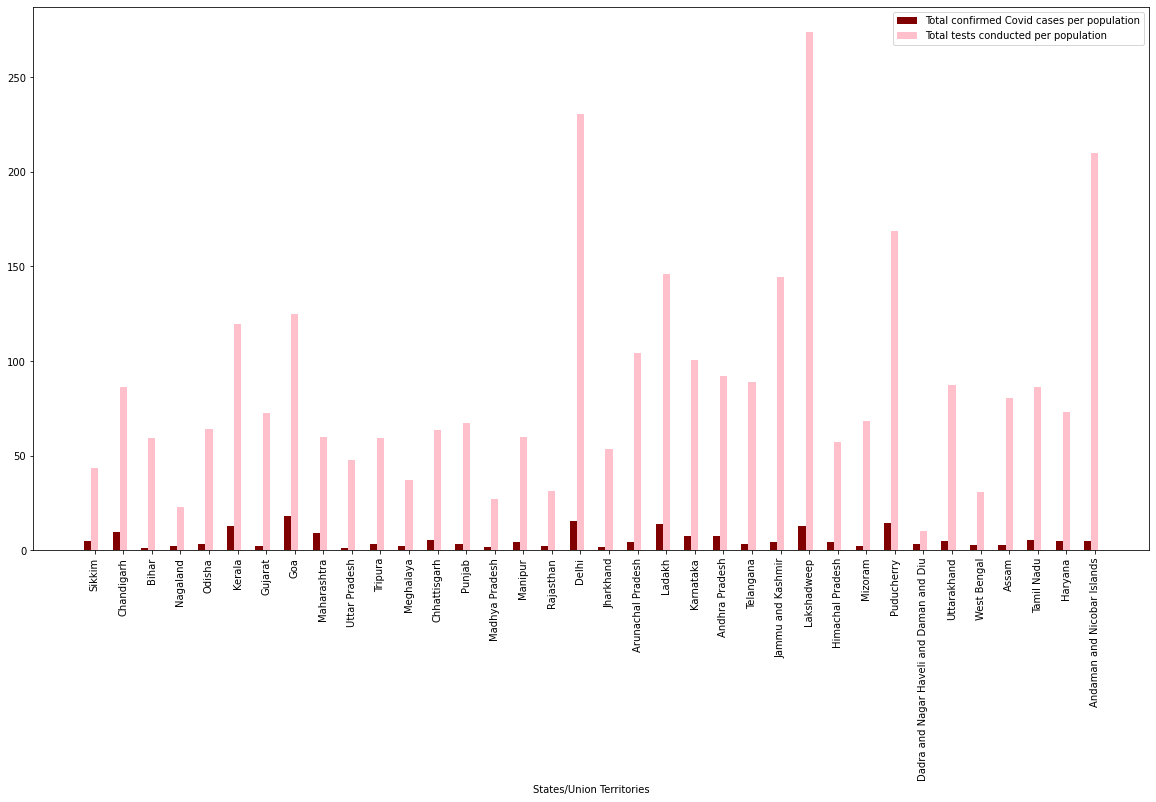

In [ ]:
f, ax = plt.subplots(figsize=(20,10))

barWidth = 0.25

br1 = np.arange(len(states))
br2 = [x + barWidth for x in br1]

plt.bar(br1, tot_c, color ='maroon', width = barWidth , label = 'Total confirmed Covid cases per population')
plt.bar(br2, tot_t, color ='pink', width = barWidth , label = 'Total tests conducted per population')

# plt.plot(states, tot_c, marker = '.', label = 'Total confirmed vs total total tests')
# plt.plot(states, dos, marker = '.', label = 'Vaccines administered deaths per population of state')

plt.xticks(rotation = 90)
plt.xlabel('States/Union Territories')
plt.xticks([r + barWidth for r in range(len(states))],
        [i for i in states])
# plt.yticks([])


plt.legend()
plt.show()


### Plotting total death vs covid deaths from Jan 2020 - May 2020

In [ ]:
path = "/content/drive/MyDrive/Datascience/Project/nation_data.csv"
dth = pd.read_csv(path)

print(dth.head())

NameError: ignored

In [ ]:
print(dth.Month)

In [ ]:
dur = dth.Month.tolist()
temp = dth['Total Deaths'].tolist()
tot = [int(i.replace(',','')) for i in temp]
cov = dth['Covid Deaths Total'].tolist()

print(len(dur),len(tot), len(cov))

### Total deaths vs deaths due to COVID

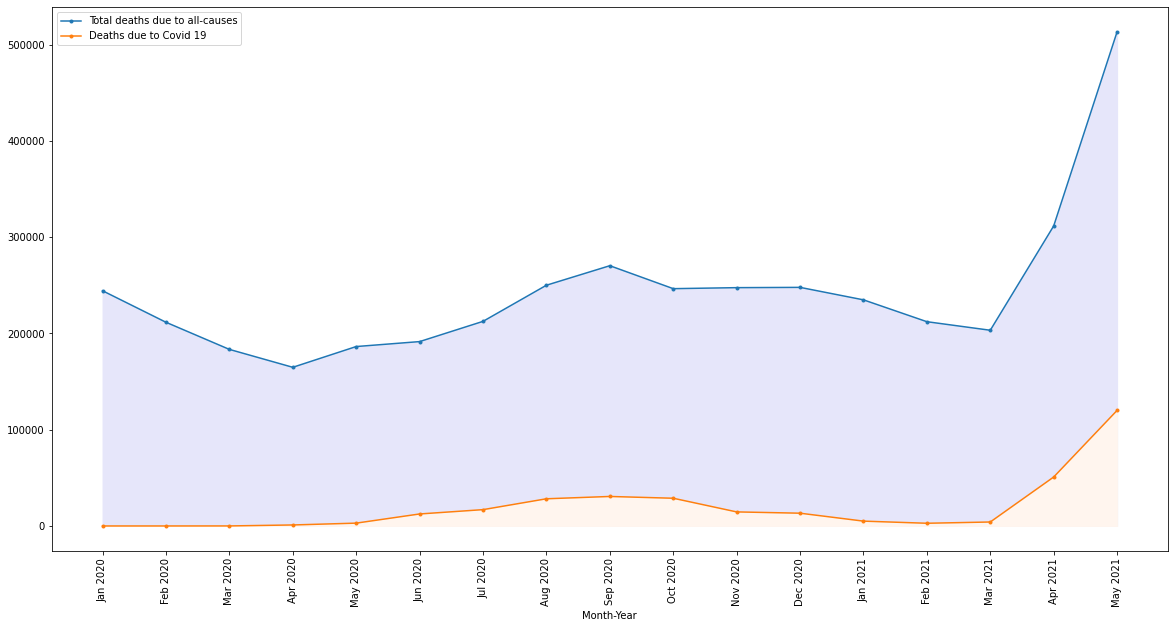

In [ ]:
f, ax = plt.subplots(figsize=(20,10))

plt.plot(dur, tot, marker = '.', label = 'Total deaths due to all-causes')
plt.plot(dur, cov, marker = '.', label = 'Deaths due to Covid 19')

plt.xticks(rotation = 90)
plt.xlabel('Month-Year')

plt.fill_between(dur, tot, color = 'lavender')
plt.fill_between(dur, cov, color = 'seashell')

plt.legend()
plt.show()

In [ ]:
conf = dth['Total confirmed'].tolist()
print(len(conf))

17


### Total Confirmed cases vs covid deaths (CFR)

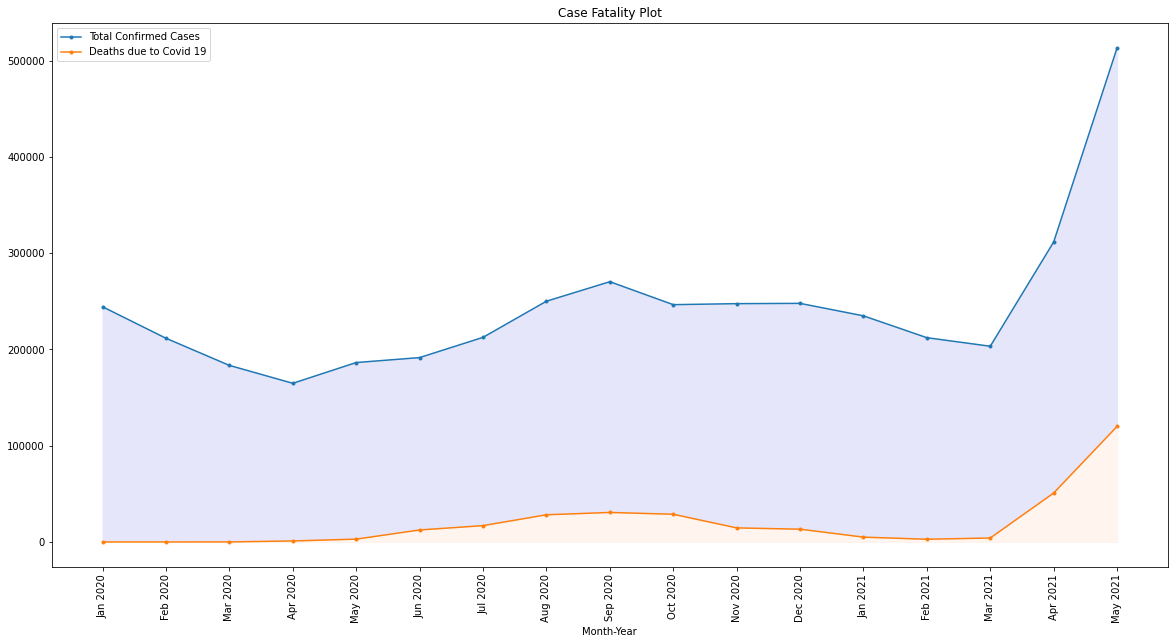

In [ ]:
f, ax = plt.subplots(figsize=(20,10))

plt.plot(dur, tot, marker = '.', label = 'Total Confirmed Cases')
plt.plot(dur, cov, marker = '.', label = 'Deaths due to Covid 19')

plt.xticks(rotation = 90)
plt.xlabel('Month-Year')
plt.title('Case Fatality Plot')

plt.fill_between(dur, tot, color = 'lavender')
plt.fill_between(dur, cov, color = 'seashell')

plt.legend()
plt.show()

In [ ]:
# test: april 2020 - august 2021
# daily case -> august